In [1]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from mc_data_mess import MC_Df_Simulation
import json

In [2]:
# load_dotenv()

In [3]:
# alpaca_api_key = os.getenv("APCA_API_KEY")
# alpaca_secret_key = os.getenv("APCA_API_SECRET")
# # Create the Alpaca API object
# # YOUR CODE HERE!
# alpaca = tradeapi.REST(
#     alpaca_api_key,
#     alpaca_secret_key,
#     api_version= "v2")

In [4]:
# print(f"Alpaca Key type: {type(alpaca_api_key)}")
# print(f"Alpca Secret Key type: {type(alpaca_secret_key)}")

In [5]:
# current_date = pd.Timestamp("2019-10-30", tz="America/New_York").isoformat()

# tickers = ["FB", "AAPL", "AMZN", "NFLX", "GOOGL"]

# timeframe = "1D"

In [6]:
# df_ticker = alpaca.get_barset(
#     tickers,
#     timeframe,
#     start=current_date
# ).df

# df_ticker

In [7]:
# df_closing_prices = pd.DataFrame()

# for ticker in tickers:
#     df_closing_prices[ticker] = df_ticker[ticker]["close"]
# # Preview DataFrame
# # YOUR CODE HERE!
# df_closing_prices

In [8]:
# df_closing_prices.index = df_closing_prices.index.date

In [9]:
# df_closing_prices

In [10]:
# df_current_price = df_closing_prices.tail(1)

In [11]:
# df_current_price

In [12]:
# fb_current_price = (df_current_price["FB"])
# aapl_current_price = (df_current_price["AAPL"])
# amzn_current_price = (df_current_price["AMZN"])
# nflx_current_price = (df_current_price["NFLX"])
# gogl_current_price = (df_current_price["GOOGL"])

In [13]:
# print(f"Current Faceboook closing prices: ${float(fb_current_price)}")
# print(f"Current Apple closing prices: ${float(aapl_current_price)}")
# print(f"Current Amazon closing prices: ${float(amzn_current_price)}")
# print(f"Current Netflix closing prices: ${float(nflx_current_price)}")
# print(f"Current Google closing prices: ${float(gogl_current_price)}")

In [14]:
# current_changes = df_closing_prices.pct_change().dropna()

In [15]:

# FACE = float(input("ENTER WEIGHT OF Facebook"))
# APPLE = float(input("ENTER WEIGHT OF Apple"))
# AMAZON = float(input("ENTER WEIGHT OF Amazon"))
# NETFL = float(input("ENTER WEIGHT OF Netflix"))
# GOOGL= float(input("ENTER WEIGHT OF Google"))

# if FACE + APPLE + AMAZON + NETFL + GOOGL == 1:
#     portfolio_weights = [FACE, APPLE, AMAZON, NETFL, GOOGL]

#     portfolio_return = current_changes.dot(portfolio_weights)

#     portfolio_return.plot(figsize = (20, 10))

# else:
#     print("Adjust your inputs. Total weight must equal 1")

# portfolio_weights

In [16]:
# import os
# import requests
# import pandas as pd
# from dotenv import load_dotenv
# import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
# import json

# %matplotlib inline

In [17]:
# load_dotenv()

In [18]:
# start_date = pd.Timestamp('2019-10-29', tz='America/New_York').isoformat()
# end_date = pd.Timestamp('2020-10-31', tz='America/New_York').isoformat()

In [19]:
#tickers = ["FB", "AAPL", "AMZN", "NFLX", "GOOGL"]

#df_stock_data = alpaca.get_barset(
    #tickers,
    #timeframe,
    #start=start_date,
    #end=end_date
#).df
# Display sample data
#df_stock_data.head()

In [20]:
#portfolio_forecast = MCSimulation(
    #portfolio_data = df_stock_data,
    #weights = [.2,.2,.2,.2,.2],
    #num_simulation = 500,
    #num_trading_days = 252*10
#)


In [21]:
#portfolio_forecast.portfolio_data.head()

In [22]:
#portfolio_forecast.calc_cumulative_return()

In [23]:
# line_plot = portfolio_forecast.plot_simulation()

In [24]:
portfolio_path = ("../Data/raw_csv/daily_prices_all_ugly.csv")


In [25]:
portfolio_df = pd.read_csv(portfolio_path)

In [26]:
#start_date = pd.Timestamp('2015-10-14', tz='America/New_York').isoformat()
#end_date = pd.Timestamp('2020-10-14', tz='America/New_York').isoformat()

In [27]:
#df_stock_data = alpaca.get_barset(
    #tickers,
    #timeframe,
    #start=start_date,
    #end=end_date
#).df

In [36]:
portfolio_mc = portfolio_df.set_index("Date")

portfolio_mc["Sum"] = portfolio_mc["Sum"].fillna(portfolio_mc["Sum"].mean())
portfolio_mc

,Sum,GOLD,sp500,VNQ,BITCOIN
Date,,,,,
2019-10-29,3554.710000,1520.60,2938.13,80.98,9387.3
2019-10-30,3581.210000,1526.50,2970.27,81.98,9162.4
2019-10-31,3576.710000,1544.00,2966.15,83.41,9208.0
2019-11-01,3608.080000,1541.30,2995.68,83.02,9170.2
2019-11-04,3646.230000,1541.60,2989.69,83.02,9155.8
...,...,...,...,...,...
2020-10-23,5725.490000,1905.20,3465.39,93.62,9300.6
2020-10-26,5671.730000,1905.70,3400.97,94.28,9230.1
2020-10-27,5774.030000,1911.90,3390.68,94.30,9152.6


In [37]:
#portfolio_mc.calc_cumulative_return()

In [38]:
portfolio_forecast = MC_Df_Simulation(
    portfolio_data = portfolio_mc,
    weights = [.2,.3,.1,.2,.2],
    num_simulation = 50,
    num_trading_days = 252*1
)


In [39]:
portfolio_forecast.portfolio_data.tail()

,Sum,GOLD,sp500,VNQ,BITCOIN
Date,,,,,
2020-10-23,5725.490000,1905.20,3465.39,93.62,9300.6
2020-10-26,5671.730000,1905.70,3400.97,94.28,9230.1
2020-10-27,5774.030000,1911.90,3390.68,94.30,9152.6
2020-10-28,5538.690000,1879.20,3271.03,94.47,9157.9
2020-10-29,4562.877589,1868.65,3310.11,94.13,9411.3


In [40]:
portfolio_forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004750,0.994156,1.001750,0.999030,0.996053,1.021540,1.009234,0.985493,1.001701,0.977995,...,1.019646,1.019758,0.991694,1.008428,0.972294,0.998774,1.019900,0.971421,0.998320,1.008955
2,1.009369,1.001454,0.996796,0.990312,1.013757,1.038229,1.021229,0.997605,1.014317,0.996854,...,1.004121,0.999974,1.000828,1.018262,0.959859,1.018324,1.012249,0.968965,0.999230,0.995669
3,1.016212,1.017640,0.997103,0.986351,1.016447,1.032924,1.023583,0.991894,1.011406,0.989863,...,1.030317,0.984921,1.009657,1.014457,0.977895,1.002328,1.051534,0.984478,0.998832,0.987618
4,1.000748,1.001654,1.012355,0.968938,1.048320,1.031766,1.029138,1.001402,1.011563,1.012571,...,1.035709,0.965934,1.012273,1.006940,0.955952,1.015569,1.041170,0.985697,1.005754,0.999896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.895497,1.732129,1.176731,1.396724,1.691712,1.192166,0.602268,0.818174,0.862060,1.516779,...,2.386147,1.052027,1.576651,1.409421,2.213215,1.254914,0.886535,1.540221,1.906156,0.833350
249,0.882041,1.720737,1.163754,1.421943,1.674091,1.216143,0.587855,0.813509,0.851524,1.522366,...,2.417098,1.058870,1.591092,1.365454,2.193654,1.249313,0.886484,1.594485,1.908314,0.836555
250,0.886080,1.688421,1.170728,1.377234,1.698393,1.233477,0.595118,0.819506,0.841818,1.556965,...,2.393486,1.058258,1.575944,1.329464,2.145742,1.271822,0.887198,1.598635,1.931294,0.850158
251,0.901873,1.682182,1.163625,1.393289,1.688686,1.242188,0.602752,0.815368,0.856484,1.556818,...,2.463608,1.021367,1.623458,1.337067,2.146197,1.279945,0.889843,1.631991,1.908489,0.842134


In [41]:
portfolio_forecast.fake

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,-0.008604,0.012946,-0.001600,0.014736,0.027297
2,-0.087256,-0.018685,0.002563,0.037200,0.000335
3,-0.056649,0.002092,0.019083,0.016403,-0.021356
4,0.082756,0.006608,0.013373,-0.018150,-0.022429
...,...,...,...,...,...
248,-0.075519,0.009346,0.009969,0.026205,0.041250
249,0.030114,-0.005825,0.026495,0.000252,-0.031805
250,0.043283,-0.009952,-0.026546,0.019882,0.054634
251,-0.032660,-0.020933,0.019147,0.002839,-0.015584


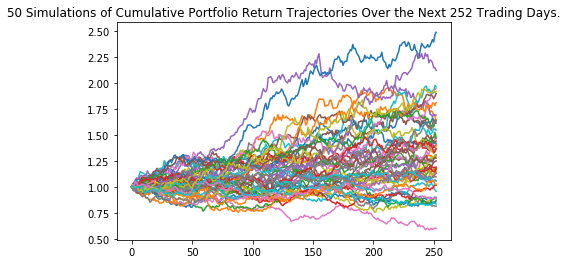

In [42]:
portfolio_forecast.plot_simulation()